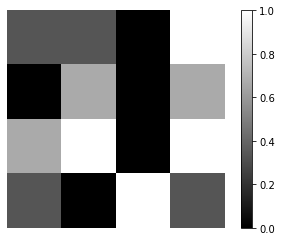

In [1]:
import numpy as np
import matplotlib.pylab as plt
A = np.array([[1,1,0,3],[0,2,0,2],[2,3,0,3],[1,0,3,1]])
plt.imshow(A / A.max(), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [2]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(A)
A / A.max()
probs = np.array([0.31, 0.45, 0.89, 0.02, 0.43, 0.21, 0.96, 0.32])
probs = probs / probs.sum()
probs
probs[0] + probs[1]

0.2116991643454039

In [3]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
print(X.shape)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(db.core_sample_indices_)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

(750, 2)
[  0   1   2   3   4   6   7   8   9  10  11  12  13  15  17  19  20  21
  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38  40  41
  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  77  78  79
  80  81  83  84  86  87  88  89  90  91  92  93  94  96  97  98  99 100
 101 102 103 104 106 107 109 111 112 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 136 137 138 139 140 141
 142 143 144 145 147 148 150 151 152 153 155 157 159 160 162 163 164 166
 167 168 169 170 171 172 173 174 175 176 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 197 198 199 200 201 203 204 205
 206 207 208 209 210 211 212 213 214 216 217 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241 242 243 244
 246 247 248 249 250 251 252 253 254 255 256 257 258 260 261 262 263 264
 266 267 268 269 270 271 272 274 275 276 2

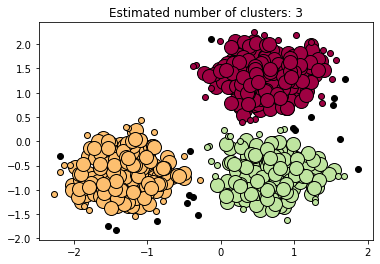

In [4]:

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

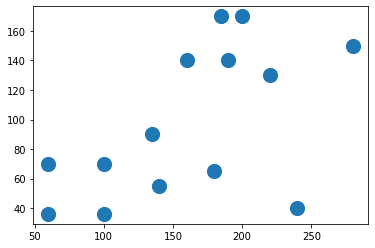

In [5]:
X_train = np.array([[60,36], [100,36], [100,70], [60,70],
    [140,55], [135,90], [180,65], [240,40],
    [160,140], [190,140], [220,130], [280,150], 
    [200,170], [185, 170]])
eps = 45
db = DBSCAN(eps=eps, min_samples=4).fit(X_train)
labels = db.labels_
labels, db.core_sample_indices_
plt.scatter(X_train[:,0], X_train[:,1], s=200)
plt.show()

In [6]:
labels

array([ 0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1, -1,  1,  1],
      dtype=int64)

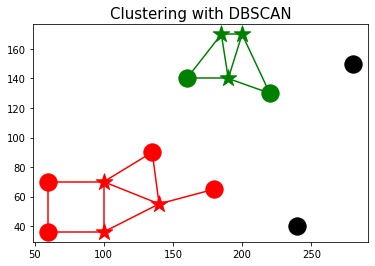

In [7]:
def dist(a, b):
    return np.sqrt(np.sum((a - b)**2))
    
colors = ['r', 'g', 'b', 'k']
for i in range(len(X_train)):
    plt.scatter(X_train[i,0], X_train[i,1], 
                s=300, color=colors[labels[i]], 
                marker=('*' if i in db.core_sample_indices_ else 'o'))
                                                            #edgecolor=['r' if i in db.core_sample_indices_ \
                                                            #else 'k' if labels[i] < 0 else labels[i] \
                                                            #for i in range(len(X))], linewidth=3)
    for j in range(i+1, len(X_train)):
        if dist(X_train[i], X_train[j])  < eps:
            plt.plot([X_train[i,0], X_train[j,0]], [X_train[i,1], X_train[j,1]], '-', color=colors[labels[i]])
            
plt.title('Clustering with DBSCAN', size=15)
plt.show()

In [8]:
db.core_sample_indices_, db.components_, X[db.core_sample_indices_,:]

(array([ 1,  2,  4,  9, 12, 13], dtype=int64),
 array([[100,  36],
        [100,  70],
        [140,  55],
        [190, 140],
        [200, 170],
        [185, 170]]),
 array([[-1.42808099, -0.83706377],
        [ 0.33855918,  1.03875871],
        [ 1.1224246 ,  1.77493654],
        [ 1.01416668,  1.34114022],
        [-1.05160416, -0.78008416],
        [ 1.15263449, -0.64853991]]))

In [9]:
def predict(db, x):
    dists = np.sqrt(np.sum((db.components_ - x)**2, axis=1))
    i = np.argmin(dists)
    return db.labels_[db.core_sample_indices_[i]] if dists[i] < db.eps else -1
    
X_test = np.array([[100, 100], [160, 160], [60, 130]])
for i in range(len(X_test)):
    print('test point: {}, predicted label: {}'.format(X_test[i], predict(db, X_test[i])))

test point: [100 100], predicted label: 0
test point: [160 160], predicted label: 1
test point: [ 60 130], predicted label: -1


In [10]:
def predict2(db, x):
    dists = np.sqrt(np.sum((db.components_ - x)**2, axis=1))
    i = np.argmin(dists)
    return (db.core_sample_indices_[i], db.labels_[db.core_sample_indices_[i]]) if dists[i] < db.eps else (-1, -1)
            
for k in range(len(X_test)):
    plt.figure(figsize=(10,7))
    colors = ['r', 'g', 'b', 'k']
    for i in range(len(X_train)):
        plt.scatter(X_train[i,0], X_train[i,1], 
                    s=300, color=colors[labels[i]], 
                    marker=('*' if i in db.core_sample_indices_ else 'o'))
                                                                #edgecolor=['r' if i in db.core_sample_indices_ \
                                                                #else 'k' if labels[i] < 0 else labels[i] \
                                                                #for i in range(len(X))], linewidth=3)
        for j in range(i+1, len(X_train)):
            if dist(X_train[i], X_train[j])  < eps:
                plt.plot([X_train[i,0], X_train[j,0]], [X_train[i,1], X_train[j,1]], '-', color=colors[labels[i]])

    ci, label = predict2(db, X_test[k])
    print(ci, label)
    plt.scatter(X_test[k,0], X_test[k,1], s=300, color=colors[label])
    if ci > 0:
        plt.plot([X_test[k,0], X_train[ci,0]], [X_test[k,1], X_train[ci,1]], '-', color=colors[label])
    plt.title('Prediction with DBSCAN\n X_test = {}, Predicted Cluster = {}'.format(X_test[k], label), size=15)
    plt.savefig('out_{:02d}.png'.format(k))
    plt.close()

2 0
13 1
-1 -1


In [11]:
dir(db)
#db.p
db.components_
#db.__weakref__

array([[100,  36],
       [100,  70],
       [140,  55],
       [190, 140],
       [200, 170],
       [185, 170]])

<AxesSubplot:ylabel='distance'>

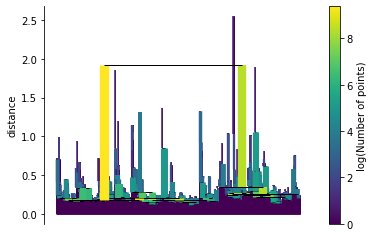

In [12]:
import hdbscan
from sklearn.datasets import make_blobs

data, _ = make_blobs(1000)

clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()

In [13]:
import torch
encoded_dim = 16
encoder = torch.nn.Sequential(
                      torch.nn.Flatten(),
                      torch.nn.Linear(28*28, 256),
                      torch.nn.Sigmoid(),
                      torch.nn.Linear(256, 64),
                      torch.nn.Sigmoid(),
                      torch.nn.Linear(64, encoded_dim)
)
decoder = torch.nn.Sequential(
                      torch.nn.Linear(encoded_dim, 64),
                      torch.nn.Sigmoid(),
                      torch.nn.Linear(64, 256),
                      torch.nn.Sigmoid(),
                      torch.nn.Linear(256, 28*28),
                      torch.nn.Sigmoid(),
                      torch.nn.Unflatten(1, (28,28))
)
autoencoder = torch.nn.Sequential(encoder, decoder)
autoencoder

Sequential(
  (0): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): Sigmoid()
    (3): Linear(in_features=256, out_features=64, bias=True)
    (4): Sigmoid()
    (5): Linear(in_features=64, out_features=16, bias=True)
  )
  (1): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=64, out_features=256, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Sigmoid()
    (6): Unflatten(dim=1, unflattened_size=(28, 28))
  )
)

In [14]:
import torchvision
data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)
#data.train_data.shape, data.train_labels.shape
x, y = data.train_data.float(), data.train_labels
x = x / 255
x.shape

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])

In [ ]:
loss_fn = torch.nn.BCELoss(reduction='mean')
learning_rate = 1e-4
for t in range(1, 51):
    # Forward pass
    x_pred = autoencoder(x)
    # loss.
    loss = loss_fn(x_pred, x)
    if t % 10 == 0:
        print(t, loss.item())
    autoencoder.zero_grad()
    # Backward pass
    loss.backward()
    with torch.no_grad():
        for param in autoencoder.parameters():
            param -= learning_rate * param.grad

10 0.704308271408081
20 0.7042941451072693
30 0.7042798399925232


In [ ]:
x_pred  = autoencoder(x)

In [ ]:
import numpy as np
import matplotlib.pylab as plt
plt.imshow(np.reshape(x_pred[0].detach().numpy(), (28,28)))

In [ ]:
x_pred[0].detach().numpy().shape
x_pred[0].detach().numpy().max()

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('C:\\Users\\Sandipan.Dey\\Downloads\\MEI_FIN_25092021230250310.csv', usecols=[14], engine='python')
print(dataframe.head())
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

In [ ]:
import numpy as np
dataset = np.array([1, 2 , 10, 12, 3, 4, 13, 14, 5, 6, 15, 16, 7, 8, 17, 18, 9, 10, 19, 20, 
                    11, 12, 21, 22, 13, 14, 23, 24, 15, 16, 25, 26], dtype=float)
dataset = dataset.reshape(-1, 1)
dataset

In [ ]:
train = dataset
look_back = 4
trainX, trainY = create_dataset(train, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=4, verbose=2)
# make predictions
trainPredict = model.predict(trainX)


In [ ]:
plt.plot(train)
plt.plot(trainPredict)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
create_dataset(train, look_back)

In [ ]:
x = trainX.ravel()
plt.plot(range(len(x)), x)

In [ ]:
testX

In [ ]:
trainX

In [ ]:
train

In [ ]:
len(dataset)

In [ ]:
testPredict

In [ ]:
n = 100
A = np.zeros((n+1, n+1))
A[0,1], A[0,0] = 1/4, 3/4
A[1,2], A[1,1], A[1,0] = 1/4, 1/2, 1/4
for k in range(2, n):
    A[k,k+1], A[k,k], A[k,k-1], A[k,k-2] = 1/4, 1/2, 1/6, 1/12
A[n,n], A[n,n-1], A[n,n-2] = 3/4, 1/6, 1/12

pA = A
for i in range(10000):
    pA = pA @ A
    
#(-3+np.sqrt(21))/6

In [ ]:
rows_gen = (row for row in open('C:\\Users\\Sandipan.Dey\\Downloads\\MEI_FIN_25092021230250310.csv'))

In [ ]:
while True:
    row = next(rows_gen, None)
    if not row:
        break
    print(row)

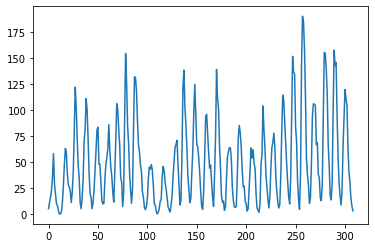

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pylab as plt
#ts = ArmaProcess(2,3).generate_sample(nsample=100)
data = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']
plt.plot(range(len(data)), data)

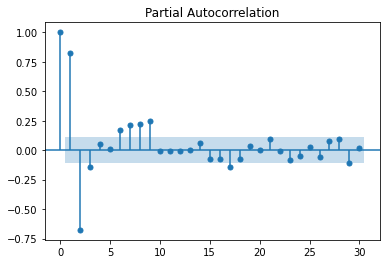

In [2]:
sm.graphics.tsa.plot_pacf(data, lags=30, method="ywm")
plt.show()

In [3]:
n = len(data)
ntrain = int(n*0.9)
ntest = n - ntrain
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(data[:ntrain], lags = 10).fit()

In [4]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  278
Model:                    AutoReg(10)   Log Likelihood               -1099.569
Method:               Conditional MLE   S.D. of innovations             14.643
Date:                Mon, 15 Nov 2021   AIC                              5.457
Time:                        02:52:35   BIC                              5.618
Sample:                            10   HQIC                             5.522
                                  278                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           7.1560      2.537      2.820      0.005       2.183      12.129
SUNACTIVITY.L1      1.1813      0.061     19.345      0.000       1.062       1.301
SUNACTIVITY.L2     -0.4188      0.094     -4.456      0.000      -0.603      -0.235
SUNACTIVITY.L3     -0.1808      0.097     -1.857      0.063      -0.372       0.010
SUNACTIVITY.L4      0.1842      0.098      1.887      0.059      -0.007       0.375
SUNACTIVITY.L5     -0.1177      0.098     -1.204      0.229      -0.309       0.074
SUNACTIVITY.L6      0.0058      0.098      0.059      0.953      -0.187       0.199
SUNACTIVITY.L7      0.0242      0.099      0.244      0.807      -0.170       0.218
SUNACTIVITY.L8     -0.0129      0.099     -0.130      0.896      -0.208       0.182
SUNACTIVITY.L9      0.1717      0.095      1.800      0.072      -0.015       0.359
SUNACTIVITY.L10     0.0196      0.062      0.318      0.751      -0.101       0.140
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0634           -0.0000j            1.0634           -0.0000
AR.2             0.8515           -0.5757j            1.0279           -0.0946
AR.3             0.8515           +0.5757j            1.0279            0.0946
AR.4             0.4207           -1.1114j            1.1883           -0.1924
AR.5             0.4207           +1.1114j            1.1883            0.1924
AR.6            -0.4633           -1.3071j            1.3868           -0.3042
AR.7            -0.4633           +1.3071j            1.3868            0.3042
AR.8            -1.2963           -0.4570j            1.3745           -0.4461
AR.9            -1.2963           +0.4570j            1.3745            0.4461
AR.10           -8.8639           -0.0000j            8.8639           -0.5000
------------------------------------------------------------------------------
"""

In [5]:
preds = res.model.predict(res.params, start=n-ntest, end=n)

In [6]:
l = 10
x = data[ntrain-l:ntrain].values
preds1 = []
for t in range(ntrain, n+1):
    pred = res.params[0] + np.sum(res.params[1:]*x[::-1])
    x[:l-1], x[l-1] = x[-(l-1):], pred
    preds1.append(pred)

In [7]:
np.allclose(preds.values, np.array(preds1))

True

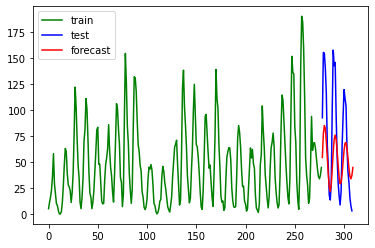

In [9]:
plt.plot(range(ntrain), data[:ntrain], label='train', color='green')
plt.plot(range(ntrain, n), data[ntrain:], label='test', color='blue')
plt.plot(range(ntrain, n+1), preds, label='forecast', color='red')
plt.legend()
plt.show()

In [10]:
l = 10
preds = []
for t in range(ntrain, n):
    pred = res.params[0] + np.sum(res.params[1:]*data[t-l:t].values[::-1])
    preds.append(pred)

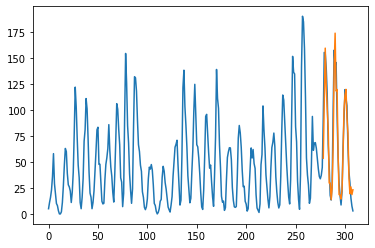

In [11]:
plt.plot(range(len(data)), data)
plt.plot(range(ntrain, n), preds)

In [1]:
%matplotlib inline
import pygame
  
# Initializing Pygame
pygame.init()
  
# Initializing surface
surface = pygame.display.set_mode((400,300))
  
# Initialing Color
color = (255,0,0)
  
# Drawing Rectangle
pygame.draw.rect(surface, color, pygame.Rect(30, 30, 60, 60),  2)
pygame.display.flip()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [87]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

import graphviz

f = graphviz.Digraph('finite_state_machine', filename='fsm.gv', format='png')
#f.attr(rankdir='LR', size='8,5')

#f.attr('node', shape='circle')
#for i in range(21):
#    f.node(str(i))

f.edge('1', '2', label='1')
f.edge('2', '1', label='1')
f.edge('13', '14', label='1')
f.edge('18', '14', label='1')
f.edge('15', '16', label='1')
f.edge('16', '3', label='1')
f.edge('17', '16', label='1')

f.edge('5', '5', label='1/2')
f.edge('5', '7', label='1/2')
f.edge('7', '7', label='1/2')
f.edge('9', '7', label='1/2')
f.edge('9', '9', label='1/2')
f.edge('12', '13', label='1/2')
f.edge('12', '18', label='1/2')

f.edge('7', '5', label='1/4')
f.edge('7', '9', label='1/4')

f.edge('3', '2', label='p')
f.edge('4', '5', label='p')
f.edge('10', '9', label='p')
f.edge('11', '1', label='p')
f.edge('14', '20', label='p')

f.edge('6', '5', label='p/2')
f.edge('6', '7', label='p/2')
f.edge('8', '7', label='p/2')
f.edge('8', '9', label='p/2')

f.edge('3', '4', label='1-p')
f.edge('4', '6', label='1-p')
f.edge('6', '8', label='1-p')
f.edge('8', '10', label='1-p')
f.edge('10', '11', label='1-p')
f.edge('11', '12', label='1-p')

f.edge('14', '15', label='(1-p)/2')
f.edge('14', '17', label='(1-p)/2')

f.edge('19', '19', label='1/2')
f.edge('19', '20', label='1/2')
f.edge('20', '19', label='1/2')
f.edge('20', '21', label='1/2')
f.edge('21', '21', label='1/2')
f.edge('21', '20', label='1/2')

f.view()

'fsm.gv.png'

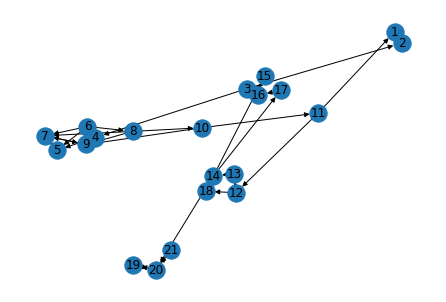

In [83]:
import networkx as nx

p = 0.5
g = nx.DiGraph()

for i in range(1,22):
    g.add_node(i)
    
g.add_edge(1, 2, weight=1)
g.add_edge(2, 1, weight=1)
g.add_edge(13, 14, weight=1)
g.add_edge(18, 14, weight=1)
g.add_edge(15, 16, weight=1)
g.add_edge(16, 3, weight=1)
g.add_edge(17, 16, weight=1)

g.add_edge(5, 5, weight=1/2)
g.add_edge(5, 7, weight=1/2)
g.add_edge(7, 7, weight=1/2)
g.add_edge(9, 7, weight=1/2)
g.add_edge(9, 9, weight=1/2)
g.add_edge(12, 13, weight=1/2)
g.add_edge(12, 18, weight=1/2)

g.add_edge(7, 5, weight=1/4)
g.add_edge(7, 9, weight=1/4)

g.add_edge(3, 2, weight=p)
g.add_edge(4, 5, weight=p)
g.add_edge(10, 9, weight=p)
g.add_edge(11, 1, weight=p)
g.add_edge(14, 20, weight=p)

g.add_edge(6, 5, weight=p/2)
g.add_edge(6, 7, weight=p/2)
g.add_edge(8, 7, weight=p/2)
g.add_edge(8, 9, weight=p/2)

g.add_edge(3, 4, weight=1-p)
g.add_edge(4, 6, weight=1-p)
g.add_edge(6, 8, weight=1-p)
g.add_edge(8, 10, weight=1-p)
g.add_edge(10, 11, weight=1-p)
g.add_edge(11, 12, weight=1-p)

g.add_edge(14, 15, weight=(1-p)/2)
g.add_edge(14, 17, weight=(1-p)/2)

g.add_edge(19, 19, weight=1/2)
g.add_edge(19, 20, weight=1/2)
g.add_edge(20, 19, weight=1/2)
g.add_edge(20, 21, weight=1/2)
g.add_edge(21, 21, weight=1/2)
g.add_edge(21, 20, weight=1/2)

nx.draw(g, with_labels=True)

In [84]:
nx.adjacency_matrix(g)

<21x21 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

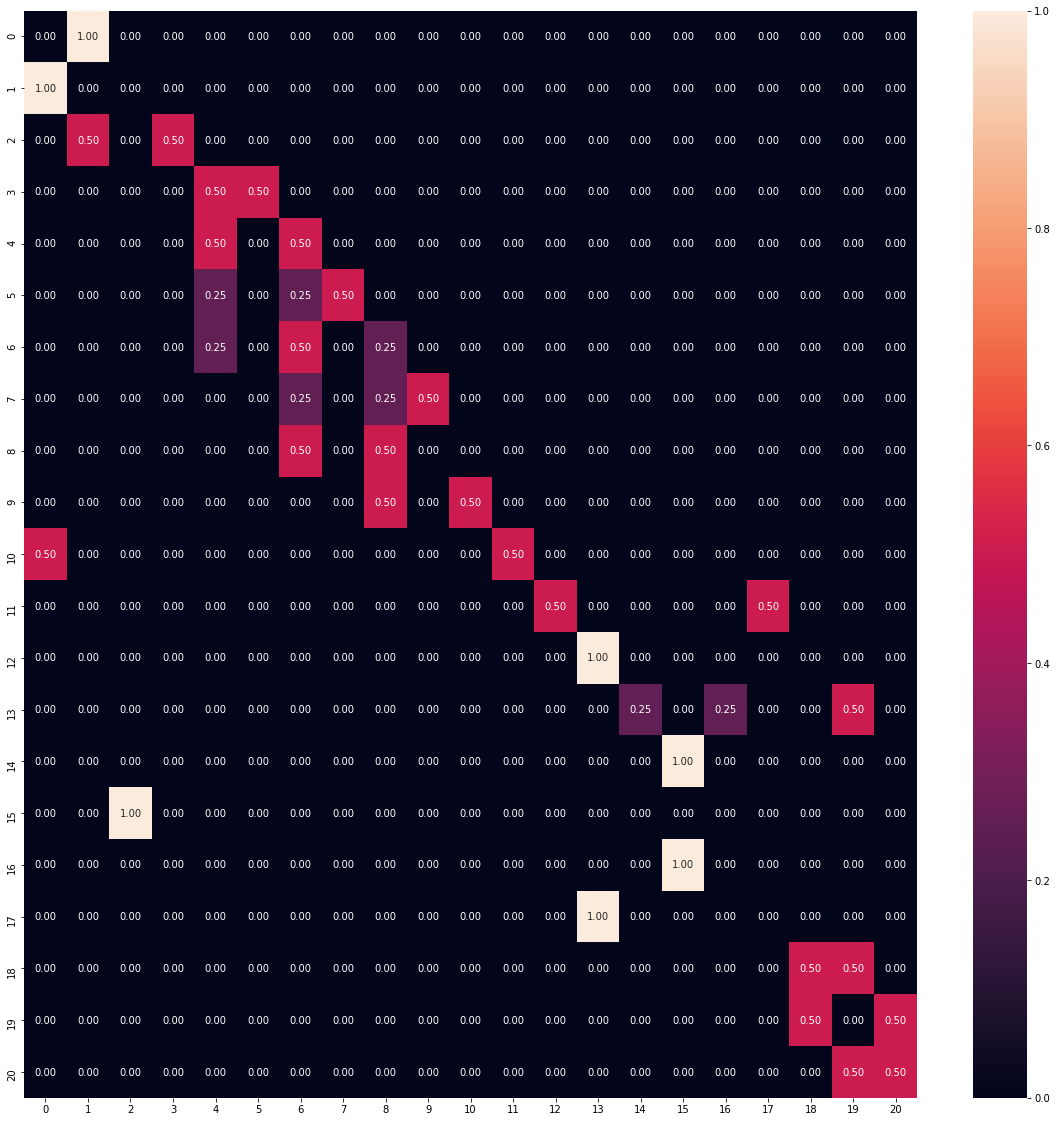

In [94]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
T =  nx.adjacency_matrix(g).todense()
plt.figure(figsize=(20,20))
sns.heatmap(T, annot=True, fmt=".2f")
plt.show()

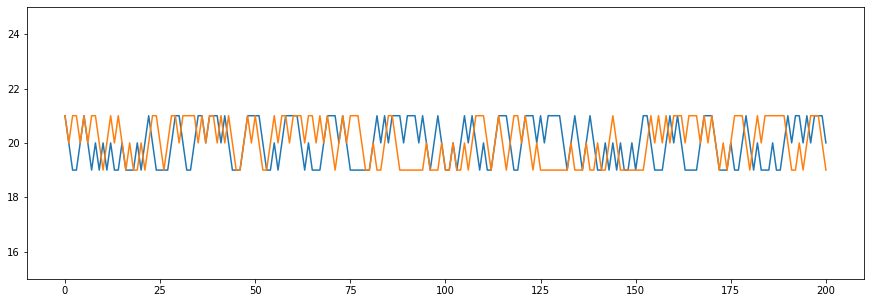

In [88]:
n_steps = 200
n_chains = 2
plt.figure(figsize=(15,5))
plt.ylim(15, 25)
for _ in range(n_chains):
    s = 21
    chain = [s]
    for _ in range(n_steps):
        nbrs = nx.neighbors(g, s)
        nbrs = list(nbrs)
        ps = []
        for nbr in nbrs:
            ps.append(T[s-1, nbr-1])
        s = np.random.choice(nbrs, 1, p=ps)[0]
        chain.append(s)
    plt.plot(range(n_steps+1), chain)
    plt.grid()
plt.show()

In [96]:
initial = np.zeros(21)
initial[19] = initial[20] = 1/2
vec = initial
for i in range(100):
    vec = vec@T
vec

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333333, 0.33333333,
         0.33333333]])

In [93]:
T.shape

(1, 21)

In [91]:
np.linalg.eig(T)

(array([-1.00000000e+00+0.00000000e+00j, -6.17272965e-01+1.81247696e-01j,
        -6.17272965e-01-1.81247696e-01j, -4.21293160e-01+4.86198225e-01j,
        -4.21293160e-01-4.86198225e-01j, -9.15557534e-02+6.36784252e-01j,
        -9.15557534e-02-6.36784252e-01j,  2.67249958e-01+5.85195779e-01j,
         2.67249958e-01-5.85195779e-01j,  5.41205696e-01+3.47811781e-01j,
         5.41205696e-01-3.47811781e-01j,  6.43332449e-01+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         5.00000000e-01+0.00000000e+00j, -1.24130867e-17+1.46112179e-17j,
        -1.24130867e-17-1.46112179e-17j,  7.48177966e-18+0.00000000e+00j,
        -5.00000000e-01+0.00000000e+00j,  5.00000000e-01+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j]),
 matrix([[-5.35039460e-01+0.00000000e+00j,
           4.68648835e-18+3.74765571e-16j,
           4.68648835e-18-3.74765571e-16j,
           2.97625842e-17+4.04650569e-16j,
           2.97625842e-17-4.04650569e-16j,
  

In [10]:
import numpy as np
Λ, V = np.linalg.eig(np.array([[1/2,1/2,0],[1/2,0,1/2],[0,1/2,1/2]]).T)
Λ
V = V[:,Λ==1]
V / sum(V)

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

In [174]:
Λ
r, g, b = np.random.randint(0, 255, 3)
r, g, b

(79, 23, 23)

In [1]:
from collections import defaultdict
from itertools import permutations, product
import dataframe_image as dfi
import numpy as np
import pandas as pd
import cv2
from skimage.io import imread, imsave
import matplotlib.pylab as plt

mmap = {'0000':(0,0), '0001':(0,1), '0011':(0,2), '0010':(0,3),
        '0100':(1,0), '0101':(1,1), '0111':(1,2), '0110':(1,3),
        '1100':(2,0), '1101':(2,1), '1111':(2,2), '1110':(2,3),
        '1000':(3,0), '1001':(3,1), '1011':(3,2), '1010':(3,3)}
    
id = 1 #0

def plot_function(dff, sop1, title):
    global id
    #dfi.export(dff, 'dataframe_{:03d}.png'.format(id))  
    im = cv2.imread('dataframe_{:03d}.png'.format(id-1))
    r, g, b = np.random.randint(0, 255, 3)
    print(r, g, b)
    for s in sop1:
        y, x = mmap[bin(s)[2:].zfill(4)]
        cv2.rectangle(im, (60+x*28, 55+y*28), (60+x*28+25, 55+y*28+25), (int(b),int(g),int(r)), 1)
    cv2.imwrite('dataframe_{:03d}.png'.format(id), im)
    id += 1
    
def kv_map(sop, vars):
    
    f = np.zeros((4,4), dtype=int)
    for x in sop:
        xb = bin(x)[2:].zfill(4)
        ab, cd = mmap[xb] #int(xb[:2],2), int(xb[2:],2)
        f[ab, cd] = 1
    #print(f)
    dff = pd.DataFrame(f)
    dff.columns = ['00', '01', '10', '11']
    dff.index = ['00', '01', '10', '11']
    dff.index.rename(''.join(vars), inplace=True)
    titles = []
    
    sop = set(sop)
    not_covered = sop.copy()
    sop_covered = set([])
    mts = []
    # check for minterms with 1 variable
    all_3 = [''.join(x) for x in product('01', repeat=3)]
    for i in range(4):
        for v_i in [0,1]:
                if len(not_covered) == 0: continue
                mt = ('' if v_i else '¬') + vars[i]
                s = [x[:i]+str(v_i)+x[i:] for x in all_3]
                sop1 = set(map(lambda x: int(x,2), s))
                if len(sop1 & sop) == 8 and len(sop_covered & sop1) < 8: # if not already covered
                    mts.append(mt)
                    #print(mt)
                    sop_covered |= sop1
                    not_covered = not_covered - sop1
                    plot_function(dff, sop1, 'K-V Map: adding single-variable minterms')
                    titles.append('K-V Map: adding single-variable minterm:\n {}'.format(mt))
    if len(not_covered) == 0:
        return mts, titles
    #print(mts, sop_covered)
    # check for minterms with 2 variables
    all_2 = [''.join(x) for x in product('01', repeat=2)]
    for i in range(4):
        for j in range(i+1, 4):
            for v_i in np.random.permutation([0,1]):
                for v_j in np.random.permutation([0,1]):
                    if len(not_covered) == 0: continue
                    mt = ('' if v_i else '¬') + vars[i] + ('' if v_j else '¬') + vars[j]
                    #print('here', mt)
                    s = [x[:i]+str(v_i)+x[i:] for x in all_2]
                    s = [x[:j]+str(v_j)+x[j:] for x in s]
                    sop1 = set(map(lambda x: int(x,2), s))
                    #if mt == '¬xy' or mt == '¬y¬z': continue
                    if len(sop1 & sop) == 4 and len(sop_covered & sop1) < 4: # if not already covered
                        mts.append(mt)
                        #print(mt)
                        sop_covered |= sop1
                        not_covered = not_covered - sop1
                        plot_function(dff, sop1, 'K-V Map: adding two-variable minterms')
                        titles.append('K-V Map: adding two-variable minterm:\n {}'.format(mt))
    if len(not_covered) == 0:
        return mts, titles
    #print(mts, sop_covered)
    # check for minterms with 3 variables
    all_1 = [''.join(x) for x in product('01', repeat=1)]
    for i in range(4):
        for j in range(i+1, 4):
            for k in range(j+1, 4):
                for v_i in np.random.permutation([0,1]):
                    for v_j in np.random.permutation([0,1]):
                        for v_k in np.random.permutation([0,1]):
                            if len(not_covered) == 0: continue
                            mt = ('' if v_i else '¬') + vars[i] + ('' if v_j else '¬') + vars[j] + ('' if v_k else '¬') + vars[k]
                            s = [x[:i]+str(v_i)+x[i:] for x in all_1]
                            s = [x[:j]+str(v_j)+x[j:] for x in s]
                            s = [x[:k]+str(v_k)+x[k:] for x in s]
                            sop1 = set(map(lambda x: int(x,2), s))
                            if mt == 'w¬xy' or mt == 'wxz': continue
                            if len(sop1 & sop) == 2 and len(sop_covered & sop1) < 2: # if not already covered
                                mts.append(mt)
                                sop_covered |= sop1
                                not_covered = not_covered - sop1
                                plot_function(dff, sop1, 'K-V Map: adding three-variable minterms')
                                titles.append('K-V Map: adding three-variable minterm:\n {}'.format(mt))

    if len(not_covered) == 0:
        return mts, titles
    for sop in not_covered:
        mt = ''.join([('' if x else '¬') + vars[i] for i, x in enumerate(bin(sop)[2:].zfill(4))])
        mts.append(mt)
        sop_covered.add(sop)
        plot_function(dff, sop1, 'K-V Map: adding remaining minterms')
        titles.append('K-V Map: adding remaining minterm:\n {}'.format(mt))
    if len(not_covered) == 0:
        return mts, titles
    
    return mts, titles
    #sopterms = list(map(lambda x: bin(x)[2:].zfill(5), sopterms))
    #bf = defaultdict()
    #for term in sopterms:
    #    bf[term] = 1
    #print(bf)
    #n, m = len(vars), 2
    #return list(permutations('1'*m + '0'*(n-m)))

#kv_map([0,2,5,7,8,10,13,15], ['A', 'B', 'C', 'D'])
#mts, titles = kv_map([1,3,4,5,6,8,9,12,14,15], ['A', 'B', 'C', 'D'])
#mts, titles

mts, titles = kv_map([0,2,4,5,8,10,11,12,13,15], ['w', 'x', 'y', 'z'])
mts, titles

49 152 254
250 33 216
195 183 53


(['x¬y', '¬x¬z', 'wyz'],
 ['K-V Map: adding two-variable minterm:\n x¬y',
  'K-V Map: adding two-variable minterm:\n ¬x¬z',
  'K-V Map: adding three-variable minterm:\n wyz'])

In [37]:
int(bin(5),2)

5

In [142]:
f = np.zeros((4,4), dtype=int)
mmap = ['0000':(0,0), '0001':(0,1), '0011':(0,2), '0010':(0,3),
        '0100':(1,0), '0101':(1,1), '0111':(1,2), '0110':(1,3),
        '1100':(2,0), '1101':(2,1), '1111':(2,2), '1110':(2,3),
        '1000':(0,0), '1001':(0,1), '1011':(0,2), '1010':(0,3)]
for x in [1,3,4,5,6,8,9,12,14,15]:
    xb = bin(x)[2:].zfill(4)
    ab, cd = int(xb[:2],2), int(xb[2:],2)
    f[ab, cd] = 1
#f[:,2], f[:,3] = f[:,3], f[:,2]
#f[2,:], f[3,:] = f[3,:], f[2,:]

array([[0, 1, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 0]])

In [168]:
?dfi.export

In [172]:
?np.random.randint

In [77]:
for id in range(1,5):
    im = imread('dataframe_{:03d}.png'.format(id))
    plt.figure(figsize=(5,6))
    plt.imshow(im), plt.axis('off'), plt.title(titles[id-1], size=15)
    plt.tight_layout()
    plt.savefig('dataframe_{:03d}_1.png'.format(id))
    plt.close()

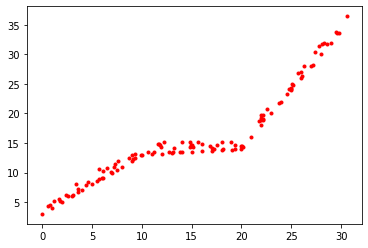

In [15]:
xs, ys = [], []
for i in range(10):
    for j in list(range(3)) + [2]:
        x = i + j*np.random.random()
        xs.append(x)
        ys.append(x+3+ j*np.random.random())
for i in range(10, 20):
    for j in list(range(3)) + [2]:
        x = i + j*np.random.random()
        xs.append(x)
        ys.append(x/10+12+ j*np.random.random())
for i in range(20, 30):
    for j in list(range(3)) + [2]:
        x = i  + j*np.random.random()
        xs.append(x)
        ys.append(2*x-26 + j*np.random.random())

xs = np.array(xs)
ys = np.array(ys)
plt.plot(xs, ys, 'r.')

In [16]:
def ls_fit(xs, ys, m):
    a = (m*sum(xs*ys)-sum(xs)*sum(ys)) / (m*sum(xs**2)-sum(xs)**2)
    b = (sum(ys)-a*sum(xs)) / m
    return a, b

In [17]:
n = len(xs)
e = np.zeros((n,n))
for j in range(n):
    for i in range(j+1):
        m = j-i+1
        if m > 1:
            a, b = ls_fit(xs[i:i+m], ys[i:i+m], m)
            e[i,j] = sum((ys[i:i+m] - a*xs[i:i+m] - b)**2)
#e[np.isnan(e)] = 0

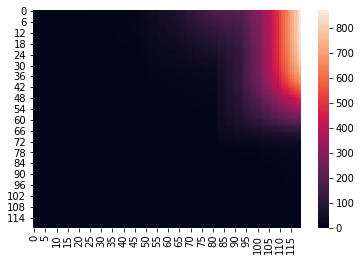

In [18]:
import seaborn as sns
#plt.figure(figsize=(20,20))
sns.heatmap(e)#, annot=True, fmt=".2f")
plt.show()

In [23]:
for c in list(range(1, 21)) + [50, 100]: 
    M = np.zeros(n)
    p = np.zeros(n, dtype=int)
    for j in range(1, n):
        cost = [e[i,j] + c + M[i-1] for i in range(j)]
        #print(cost)
        M[j] = np.min(cost)
        p[j] = np.argmin(cost)
    #print(p)
    tol = 5 #2
    starts = np.unique(p)
    drawn = set([])
    plt.plot(xs, ys, 'g.')
    for start in starts:
        indices = np.where(abs(p-start) < tol)[0]
        a, b = ls_fit(xs[indices], ys[indices], len(indices))
        if not (a, b) in drawn:
            plt.plot([xs[min(indices)],xs[max(indices)]], [a*xs[min(indices)]+b, a*xs[max(indices)]+b], linewidth=3, 
                     label='line: ({:.2f}, {:.2f})'.format(a,b))
            drawn.add((a,b))
    plt.legend()
    plt.xlabel('x', size=15)
    plt.ylabel('y', size=15)
    plt.title('Segmented Least-Squares with DP (c={})'.format(c), size=20)
    plt.savefig('segls_{:03d}.png'.format(c))
    plt.close()

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [224]:
?plt.axline

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
acc = 10**-4
a = np.linspace(-1/10,1,1000)

def plot_function(i, x, x_prev=None):
    plt.plot(a, p(a))
    plt.axhline(0, linestyle='-', alpha=0.4)
    plt.axvline(0, linestyle='-', alpha=0.4)
    plt.plot([x_prev, x], [p(x_prev), 0], 'r.-')
    plt.plot([x, x], [0, p(x)], 'r.-', linestyle='--')
    plt.title('Newton-Raphson iteration {}'.format(i), size=20)
    #plt.ylim(-0.5, 1)
    plt.grid()
    plt.savefig('nr_{:03d}.png'.format(i))
    plt.close()

x = sym.Symbol('x')
def p(x): #define the function
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def p_prime(xval): 
    return sym.diff(p(x)).subs(x, xval)

def newton(p,p_prime, prec, start_val):
    x= xp = start_val
    delta = p(x)/p_prime(x)
    i = 1
    while abs(delta) > acc:
        delta = p(x)/p_prime(x)
        xp = x
        x =x - delta; 
        plot_function(i, x, xp)
        i += 1
                 
    return round(x, prec);

a = newton(p, p_prime, 4, 0.1)
a

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  if sys.path[0] == '':
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  if sys.path[0] == '':
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  if sys.path[0] == '':
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> lin

0.0338

In [26]:
sym.diff(p(x))

5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

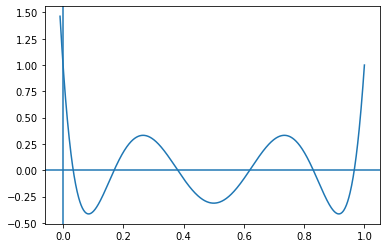

In [48]:
a = np.linspace(-1/100,1,1000)
plt.plot(a, p(a))
plt.axhline(0)
plt.axvline(0)

In [87]:
xs = np.linspace(0.1, 0.7)

def plot_function(i, x, x_prev):
    plt.plot(xs, f(xs))
    plt.axhline(0, linestyle='-', alpha=0.4)
    plt.axvline(0, linestyle='-', alpha=0.4)
    plt.plot([x_prev, x], [f(x_prev), 0], 'r.-')
    plt.plot([x, x], [0, f(x)], 'r.-', linestyle='-')
    plt.title('Newton-Raphson iteration {}'.format(i), size=20)
    plt.grid()
    plt.savefig('nr_{:03d}.png'.format(i))
    plt.close()

def f(x):
    return a - 1/x

def df(x):
    return 1/x**2
        
def newton_raphson(f, df): 
    x = 0.6
    eps = 1e-6 # accuracy
    x1 = x
    i = 1
    while True:
        x1 -= f(x) / df(x)
        if abs(x1 - x) < eps: # converged?
            break
        plot_function(i, x1, x)
        x = x1
        print(x)
        i += 1

a = 3
newton_raphson(f, df)

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  


0.12
0.1968


C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  


0.27740928
0.3239508341096448


C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r.-" (-> linestyle='-'). The keyword argument will take precedence.
  


0.3330692394582858
0.3333331240966088


In [67]:
def get_grammar(rules):
    G = {}
    for rule in rules:
        rule = rule.replace(' ', '')
        lhs, rhs = rule.split('->')
        for r in rhs.split('|'):
            G[lhs] = G.get(lhs, []) + [r]
    return G

def is_in_CNF(G, NTs, Ts):
    for lhs in G.keys():
        if lhs in NTs:
            for rhs in G[lhs]:
                if len(rhs) == 2:   # of the form A -> BC
                    if not rhs[0] in NTs or not rhs[1] in NTs:
                        return False
                elif len(rhs) == 1: # of the form S -> a
                    if not rhs in Ts + ['ϵ']:
                        return False
                else:
                    return False
    return True

rules = ['S -> N V', 'V -> B N', 'N -> D M', 'P -> I N', 'P -> N P', 'S -> M V', 'V -> B M', 'P -> I M', 'P -> M P', 'V -> V P', 'I -> w', 'M -> d|c|m', 
'B -> a', 'D -> t']
#rules = ['S -> AB | BC', 'A -> BA | a', 'B -> CC | b', 'C -> AB | a'] #, 'D -> ϵ']
G = get_grammar(rules)
print(G)
NTs = ['S', 'N', 'V', 'B', 'P', 'I', 'M', 'D']
Ts = ['w', 'd', 'c', 'm', 'a', 't']
#NTs = ['S', 'A', 'B', 'C', 'D']
#Ts = ['a', 'b']
is_in_CNF(G, NTs, Ts)

{'S': ['NV', 'MV'], 'V': ['BN', 'BM', 'VP'], 'N': ['DM'], 'P': ['IN', 'NP', 'IM', 'MP'], 'I': ['w'], 'M': ['d', 'c', 'm'], 'B': ['a'], 'D': ['t']}


True

In [98]:
import numpy as np
import pandas as pd
import dataframe_image as dfi
#import df2img

M = {'t': 'the', 'c': 'cat', 'a': 'ate', 'd': 'dog', 'w': 'with', 'D': 'DT', 'V':'VP', 'N':'NP', 'B':'VB', 'M':'NN', 'P':'PP', 'I':'IN', 'S':'S', '':''}

def show_DP_table(w, tbl):
    names = list(map(lambda x: M[x], list(w)))
    print(names)
    df = pd.DataFrame(columns = names)
    for row in tbl:
        row = list(map(lambda x:M[x], row))
        df = df.append(pd.DataFrame([row], columns=df.columns), ignore_index = True)
    df.index = df.columns
    return df

def is_in_cartesian_prod(x, y, r):
    return r in [i+j for i in x.split(',') for j in y.split(',')]

id = 0
    
def CYK(w, G, S):
    global id
    if w == 'ϵ':
        return 'ϵ' in G[S]
    n = len(w)
    DP_table = [['']*n for _ in range(n)]
    for i in range(n):
        for lhs in G.keys():
            for rhs in G[lhs]:
                 if w[i] == rhs:
                    DP_table[i][i] = lhs if not DP_table[i][i] else DP_table[i][i] + ',' + lhs
                    df = show_DP_table(w, DP_table)
                    df = df.style.set_table_attributes("style='display:inline'") \
                            .set_caption('use rule {} --> {}'.format(M[lhs], M[w[i]]))
                    '''
                    df = df2img.plot_dataframe(show_DP_table(w, DP_table), \
                                            title=dict(
                                                font_color="darkred",
                                                font_family="Times New Roman",
                                                font_size=16,
                                                text='{} --> {}'.format(lhs, w[i]),
                                            ),
                                            tbl_header=dict(
                                                align="right",
                                                fill_color="blue",
                                                font_color="white",
                                                font_size=10,
                                                line_color="darkslategray",
                                            ),
                                            tbl_cells=dict(
                                                align="right",
                                                line_color="darkslategray",
                                            ),
                                            row_fill_color=("#ffffff", "#d7d8d6"),
                                            fig_size=(300, 160))
                    '''
                    #dfi.export(df, 'dataframe_{:03d}.png'.format(id))
                    id += 1
                    
    for l in range(2, n+1):       # span
        for i in range(n-l+1):    # start
            j = i+l-1             # right
            for k in range(i, j): # partition
                for lhs in G.keys():
                    for rhs in G[lhs]:
                        if len(rhs) == 2: #rules of form A -> BC:
                            #print(l, i, j, k, DP_table[i][k], DP_table[k+1][j], rhs)
                            if is_in_cartesian_prod(DP_table[i][k], DP_table[k+1][j], rhs):
                                if not lhs in DP_table[i][j]:
                                    DP_table[i][j] = lhs if not DP_table[i][j] else DP_table[i][j] + ',' + lhs
                                    df = show_DP_table(w, DP_table)
                                    df = df.style.set_table_attributes("style='display:inline'") \
                                        .set_caption('use rule {} --> {}'.format(M[lhs], 
                                                                                 ' '.join(list(map(lambda x: M[x], rhs)))))
                                    '''
                                    df = df2img.plot_dataframe(show_DP_table(w, DP_table), 
                                                        title=dict(
                                        font_color="darkred",
                                        font_family="Times New Roman",
                                        font_size=16,
                                        text='{} --> {}'.format(lhs, rhs),
                                    ),
                                    tbl_header=dict(
                                        align="right",
                                        fill_color="blue",
                                        font_color="white",
                                        font_size=10,
                                        line_color="darkslategray",
                                    ),
                                    tbl_cells=dict(
                                        align="right",
                                        line_color="darkslategray",
                                    ),
                                    row_fill_color=("#ffffff", "#d7d8d6"),
                                    fig_size=(300, 160))
                                    '''
                                    dfi.export(df, 'dataframe_{:03d}.png'.format(id))
                                    id += 1
    if S in DP_table[0][n-1]:
        print('accepted')
    else:
        print('not accepted')
    return show_DP_table(w, DP_table)    

CYK('tcatdwtc', G, 'S')

['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat', 'ate', 'the', 'dog', 'with', 'the', 'cat']
['the', 'cat',

,the,cat,ate,the,dog,with,the,cat
the,DT,NP,,,S,,,S
cat,,NN,,,S,,,S
ate,,,VB,,VP,,,VP
the,,,,DT,NP,,,PP
dog,,,,,NN,,,PP
with,,,,,,IN,,PP
the,,,,,,,DT,NP
cat,,,,,,,,NN


In [105]:
import graphviz

g = graphviz.Graph('G', filename='process.gv', format='png')

g.edge('the1', 'DT1')
g.edge('cat1', 'NN1')
g.edge('ate', 'VB')
g.edge('2the', 'DT2')
g.edge('dog', 'NN2')
g.edge('with', 'IN')
g.edge('3the', 'DT3')
g.edge('cat2', 'NN3')
g.edge('DT3', 'NP3')
g.edge('NN3', 'NP3')
g.edge('IN', 'PP')
g.edge('NP3', 'PP')
g.edge('DT1', 'NP1')
g.edge('DT2', 'NP2')
g.edge('NN1', 'NP1')
g.edge('NN2', 'NP2')
g.edge('VB', 'VP')
g.edge('NP2', 'VP')
g.edge('NP1', 'S')
g.edge('PP', 'VP1')
g.edge('VP', 'VP1')
g.edge('VP1', 'S')

g.view()

'process.gv.png'

In [165]:
def CRC_polynomial_to_bin_code(pol):
    return bin(eval(pol.replace('^', '**').replace('x','2')))[2:]

def get_remainder(data_bin, gen_bin):
    ng = len(gen_bin)
    data_bin += '0'*(ng-1)
    nd = len(data_bin)
    divisor = gen_bin
    i = 0
    remainder = ''
    print('\nmod 2 division steps:')
    print('divisor dividend remainder')
    while i < nd:
        j = i + ng - len(remainder)
        if j > nd: 
            remainder += data_bin[i:]
            break
        dividend = remainder + data_bin[i:j]
        remainder = ''.join(['1' if dividend[k] != gen_bin[k] else '0' for k in range(ng)])
        print('{:8s} {:8s} {:8s}'.format(divisor, dividend, remainder[1:]))
        remainder = remainder.lstrip('0')
        i = j
    return remainder.zfill(ng-1)

gen_bin = CRC_polynomial_to_bin_code('x^3+x') #'x^3+x^2+1') #
data_bin = CRC_polynomial_to_bin_code('x^11 + x^8 + x^7 + x^2 + x + 1') #'x^5+x^2') #
print('transmitter end:\n\nCRC key: {}, data: {}'.format(gen_bin, data_bin))
r = get_remainder(data_bin, gen_bin)
data_crc = data_bin + r
print('\nencoded data: {}'.format(data_crc))
print('\nreceiver end:')
r = get_remainder(data_crc, gen_bin)
print('\nremainder {}'.format(r))

if eval(r) == 0:
    print('data received at the receiver end has no errors')

transmitter end:

CRC key: 1010, data: 100110000111

mod 2 division steps:
divisor dividend remainder
1010     1001     011     
1010     1110     100     
1010     1000     010     
1010     1000     010     
1010     1011     001     
1010     1100     110     
1010     1100     110     

encoded data: 100110000111110

receiver end:

mod 2 division steps:
divisor dividend remainder
1010     1001     011     
1010     1110     100     
1010     1000     010     
1010     1000     010     
1010     1011     001     
1010     1111     101     
1010     1010     000     

remainder 000
data received at the receiver end has no errors


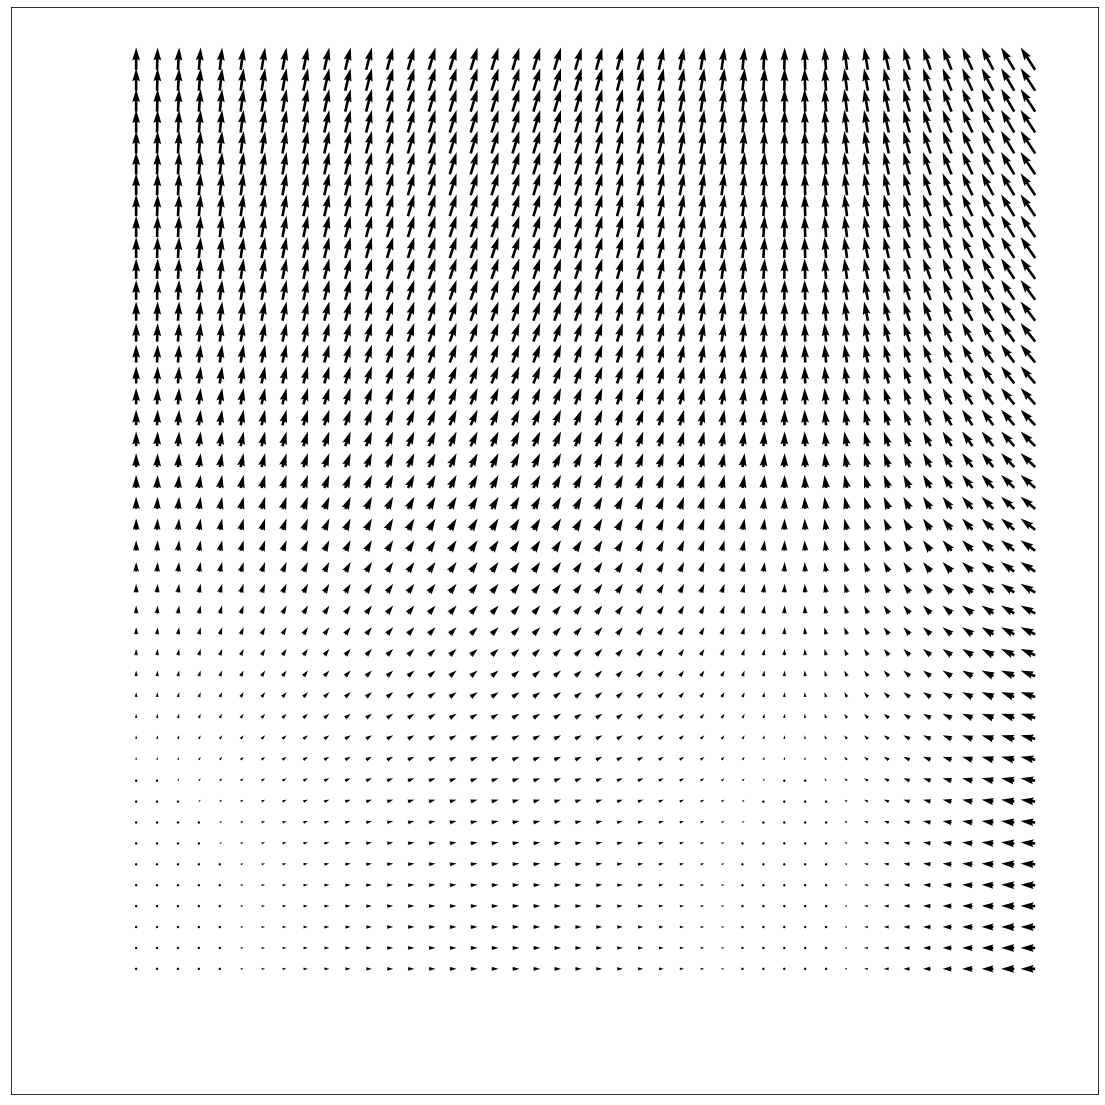

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating arrow
x = np.arange(0, 2.2, 0.05)
y = np.arange(0, 2.2, 0.05)
 
X, Y = np.meshgrid(x, y)
u = np.cos(X)*X
v = np.sin(Y)*Y
 
# creating plot
fig, ax = plt.subplots(figsize =(20, 20))
ax.quiver(X, Y, u, v)
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-0.3, 2.3, -0.3, 2.3])
ax.set_aspect('equal')
 
# show plot
plt.show()

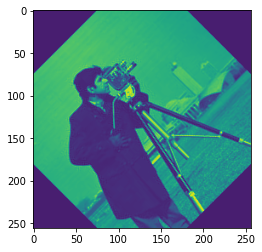

In [2]:
import numpy as np
import cv2

x = cv2.imread('cameraman.png', 0) #np.random.randint(800, 1000, size=[100, 100, 3])
x = x / x.max()

from scipy.ndimage.interpolation import rotate
rotated = rotate(x, angle=45, reshape=False)

from skimage.transform import rotate
rotated2 = rotate(x, angle=45)

plt.imshow(rotated)

In [ ]:
plt.imshow(rotated2)

In [ ]:
from PIL import Image
rotated3  = np.array(Image.fromarray(x).rotate(45))
plt.imshow(rotated3)

-5 -5 -30.0 -5.5835605280214144 -16.068200966860566 -6.507524106731
-5 0 -13.390167472383805 -5.0 -16.068200966860566 -6.0
0 -5 -25.0 -4.941357420405513e-25 -5.0 -9.882714840811025e-26
0 0 0.0 0.0 0.0 0.0


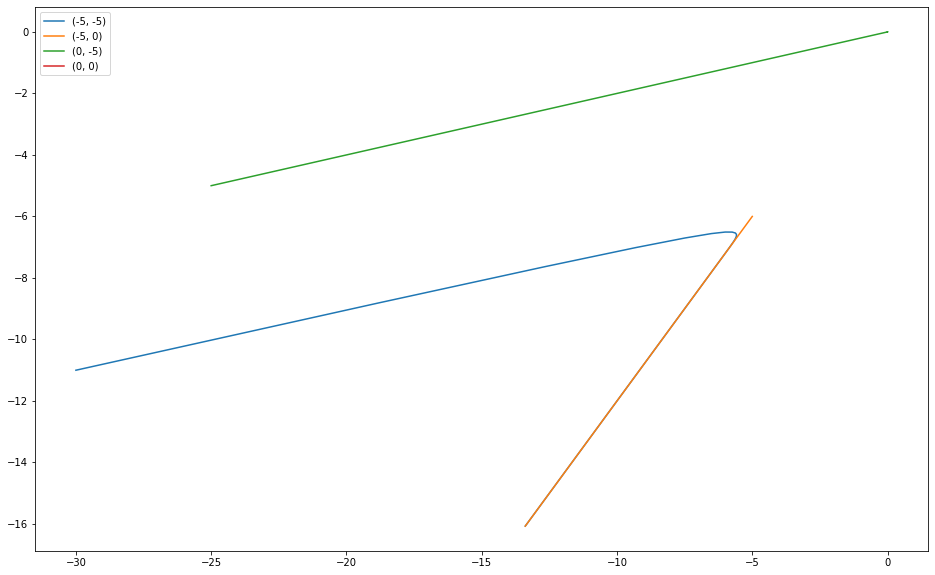

In [54]:
import numpy as np
import matplotlib.pylab as plt

plt.figure(figsize= (16,10))
for c1 in np.arange (-5, 5, 5):
    for c2 in np.arange (-5, 5, 5):
        #print(c1, c2)
        y1 = []
        y2 = []
        for k in range (0, 100):
            y = c1*(1.01**k) + c2*(0.55**k)*5
            y1.append(y)
            yy = c1*(1.01**k)*1.2 + c2*(0.55**k)
            y2.append(yy)
        plt.plot(y1, y2, label='({}, {})'.format(c1,c2))
        print(c1, c2, np.min(y1), np.max(y1), np.min(y2), np.max(y2))
plt.legend()

In [27]:
v1 = np.array([1, 1.2])
v2 = np.array([5, 1])
λ1, λ2 = 1.01, 0.55
c1, c2 = 1, 1

In [33]:
c1s = np.arange (-5, 5, 0.5)
c2s = np.arange (-5, 5, 0.5)
ks = range(50)
A, B = np.zeros((len(c1s), len(c2s), len(ks))), np.zeros((len(c1s), len(c2s), len(ks)))
for c1 in c1s:
    for c2 in c2s:
        for k in ks:
            A[c1, c2, k], B[c1, c2, k] = c1*λ1**k*v1 + c2*λ2**k*v2

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'linewidth'


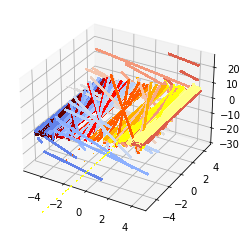

In [66]:
from matplotlib.ticker import LinearLocator
from matplotlib import cm

c1 = np.arange (-5, 5, 0.5)
c2 = np.arange (-5, 5, 0.5)

c1, c2 = np.meshgrid(c1, c2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for k in range(50):
    Ak = c1*λ1**k*v1[0] + c2*λ2**k*v2[0]
    Bk = c1*λ1**k*v1[1] + c2*λ2**k*v2[1]
    #print(Ak, Bk)
    #plt.scatter(Ak, Bk, c=k)
    ax.contour(c1, c2, Ak, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)
    ax.contour(c1, c2, Bk, cmap=cm.hot,
                       linewidth=0.1, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
#plt.colorbar()


In [7]:
c1, c2

(4.5, 4.5)